In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as lm

Load and Look at data

In [51]:
wine = pd.read_csv(r'C:\Users\yoni.browning\Downloads\redwhite\wine-quality-white-and-red.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Plot some data

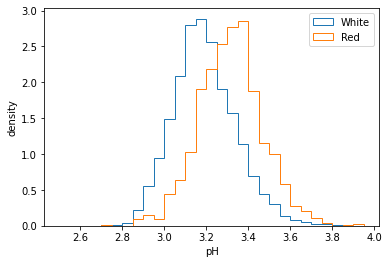

In [86]:
fig,ax = plt.subplots()
bins = np.arange(2.5,4,.05)
ax.hist(wine[wine.type=='white'].pH,bins,density = True,histtype='step',label='White');
ax.hist(wine[wine.type=='red'].pH,bins,density = True,histtype='step',label='Red');
ax.set_ylabel('density')
ax.set_xlabel('pH')
ax.legend()

Convert to one-hot for regression model

In [80]:
its_a_red = np.array(wine.type == 'red')
its_a_white = np.array(wine.type=='white')
X = np.vstack([its_a_red,its_a_white]).T
X = X.astype(int)

Also get y

In [82]:
y = wine.pH

Now instantiate a fitting object

In [105]:
LinearModel = lm.LinearRegression(fit_intercept=False) # Why false-->discuss

Then use it to fit the model

In [ ]:
LinearModel.fit(X,y)

And look at the results!

In [107]:
LinearModel.coef_

array([5.63602251, 5.87790935])

Another example-->
We can answer the age old question of Which is better, red wine or white wine (in portugal, anyway)?

In [102]:
LinearModel = lm.LinearRegression(fit_intercept=False)
LinearModel.fit(X,y)
LinearModel.coef_

array([5.63602251, 5.87790935])

Could include some prediction here?

In [109]:
LinearModel.predict(X)
# Would have been better if we held out some data...but maybe more than is needed for this example.

array([5.87790935, 5.87790935, 5.87790935, ..., 5.63602251, 5.63602251,
       5.63602251])